<h1 style="text-align: center;">Sequential Neural Network</h1>
<h3 style="text-align: center;">Carlos Moreno</h3>

-> Librerías

In [2]:
import os
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x, y = torch.load("MNIST\\processed\\training.pt")

C:\Users\Eoweo\AppData\Local\Temp\ipykernel_12248\3680437073.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x, y = torch.load("MNIST\\processed\\training.pt")


In [4]:
x.shape, y.shape #imagenes , Labels

(torch.Size([60000, 28, 28]), torch.Size([60000]))

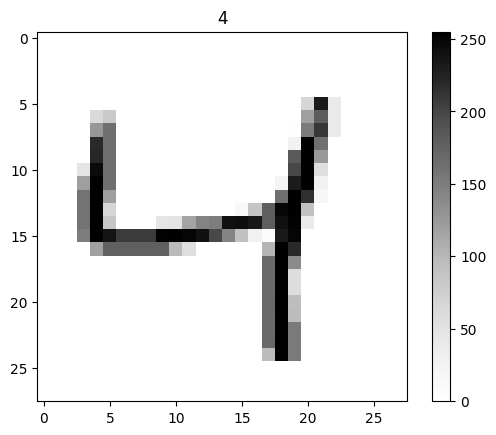

In [15]:
plt.imshow(x[2].numpy(), cmap= "Greys")
plt.title(f'{y[2].numpy()}')
plt.colorbar()
plt.show()

Clase Dataset (Inicializa los datos y los reordena)

In [ ]:
class MainDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath) #Upload ·· x - Number, y - Labels
        self.x = self.x / 255. #Normalizamos
        self.y = F.one_hot(self.y, num_classes=10).to(float) # Enconder para clasificación por vectores
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix] # i-ésimo numero, label iésima